Notebook for working with wavelet decomposition in an example.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.stats import norm

In [ ]:
# custom libs
import sys
sys.path.append("../..") # se subir de pasta, "../" em vez de "../.../"

from src.libs.simulations import simulate_curves
from src.libs.dynamicFPC import W_dFPC

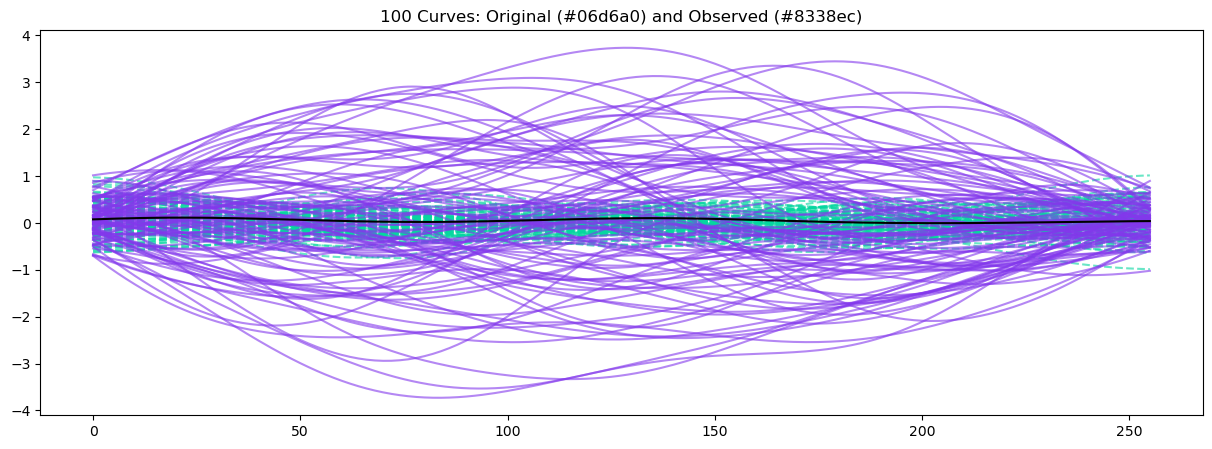

In [234]:
# model_xi1 = arima('Constant',0,'AR',{-.775},'Variance',.01);
# model_xi2 = arima('Constant',0,'AR',{.65},'Variance',.01);
# model_xi3 = arima('Constant',0,'AR',{-.525},'Variance',.01);
# model_xi4 = arima('Constant',0,'AR',{.4},'Variance',.01);

# model_xi1 = arima('Constant',0,'AR',{-.8167},'Variance',.01);
# model_xi2 = arima('Constant',0,'AR',{.7333},'Variance',.01);
# model_xi3 = arima('Constant',0,'AR',{-.65},'Variance',.01);
# model_xi4 = arima('Constant',0,'AR',{.5667},'Variance',.01);
# model_xi5 = arima('Constant',0,'AR',{-.4833},'Variance',.01);
# model_xi6 = arima('Constant',0,'AR',{.4},'Variance',.01);


n = 100          # sample size (curves)
d = 2            # dimension parameter
nt = 256         # number of grid points
u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
phis = [-0.775, 0.65, -0.525, 0.4]
variance = 0.01
N = 3            # wavelet decomposition level

Y, X, mEps = simulate_curves(n,nt,u,phis, variances=np.full(len(phis), variance))

plt.figure(figsize=(15,5))


color_original = "#06d6a0"
plt.plot(X, alpha=.6, c=color_original, linestyle="--",label="Unobserved")

color_observed = "#8338ec"
plt.plot(Y, alpha=.6, c=color_observed, label="Observed")

plt.plot(np.mean(Y,axis=1), c="black")

plt.title(f"{n} Curves: Original ({color_original}) and Observed ({color_observed})")

plt.show()

# Classe para decomposição

In [243]:
# PARÂMETROS
n = 100          # sample size (curves)
d = 2            # dimension parameter
nt = 256         # number of grid points
u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid

N = 3            # wavelet decomposition level
wavelet = 'db2'
p = 5
dimensions = 10

model = W_dFPC(Y)
model.fit(
    nt=nt,
    N=N,
    wavelet=wavelet,
    p=p,
    d=dimensions)

C:\Users\user\AppData\Local\Temp\ipykernel_9768\3283452001.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
C:\Users\user\AppData\Local\Temp\ipykernel_9768\3283452001.py:161: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


In [248]:
model.eig_proportion(5)

Proportion of the total eigenvalue mass contained in the first 5 eigenvalues: 99.84790%


C:\Users\user\AppData\Local\Temp\ipykernel_9768\3283452001.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
C:\Users\user\AppData\Local\Temp\ipykernel_9768\3283452001.py:161: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


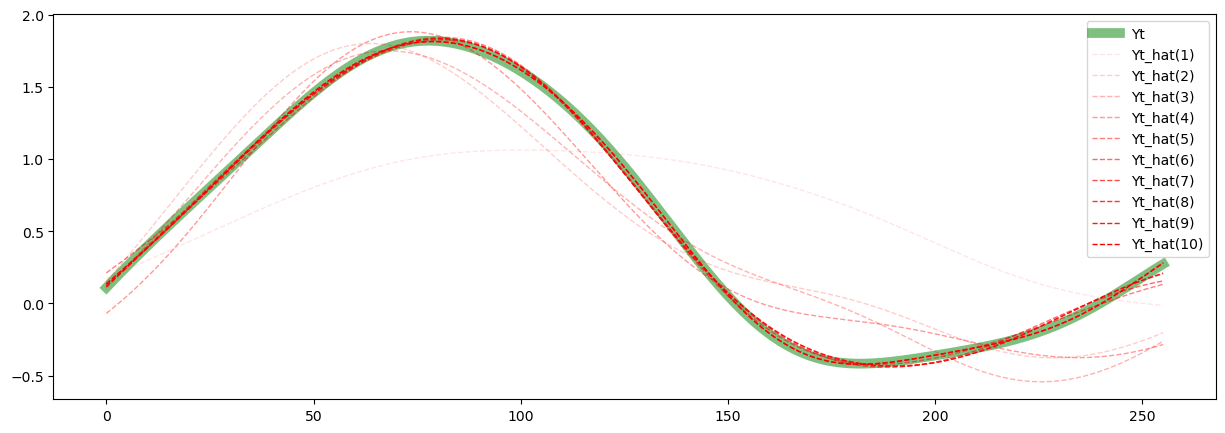

In [249]:
t = 3
Yt = Y[:, t]

plt.figure(figsize=(15,5))
plt.plot(Yt, label="Yt", linewidth=7, c = "green", alpha=.5)

D = 10
alpha0=1/D
alpha_ = alpha0
for d in range(1,D+1):
    model = W_dFPC(Y)
    model.fit(
        nt=nt,
        N=N,
        wavelet=wavelet,
        p=p,
        d=d)
    Yt_hat = model.Yhat[:,t]
    
    plt.plot(Yt_hat, label=f"Yt_hat({d})", alpha=alpha_, linestyle="--", c="red", linewidth=1)
    alpha_ += alpha0



plt.legend()

plt.show()

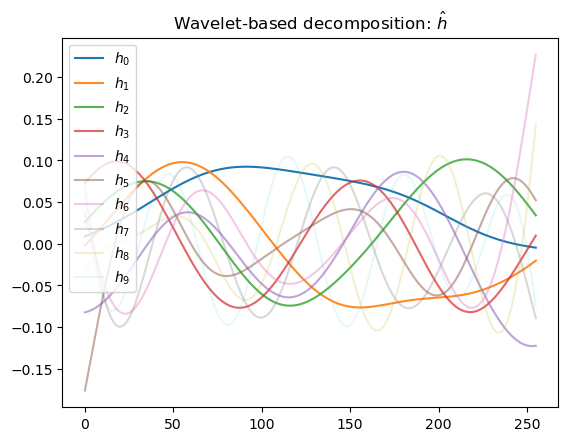

In [250]:
model.plot_hm(shared=True)

c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


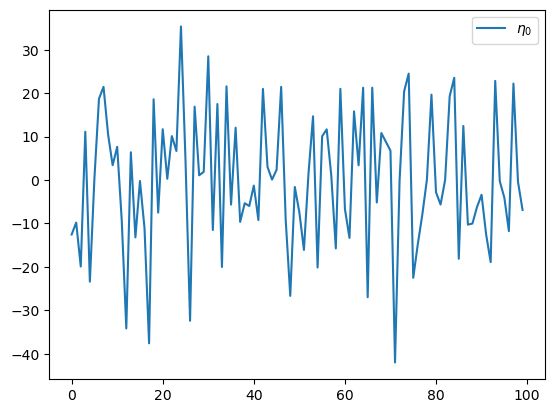

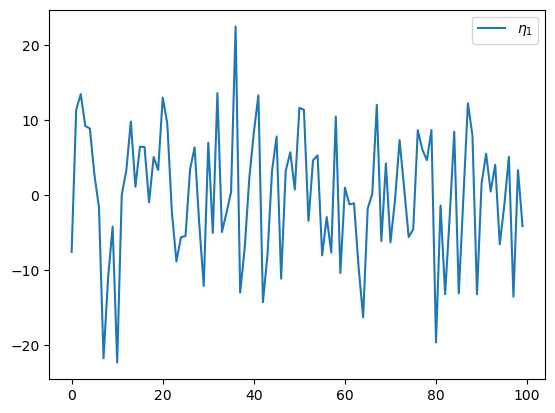

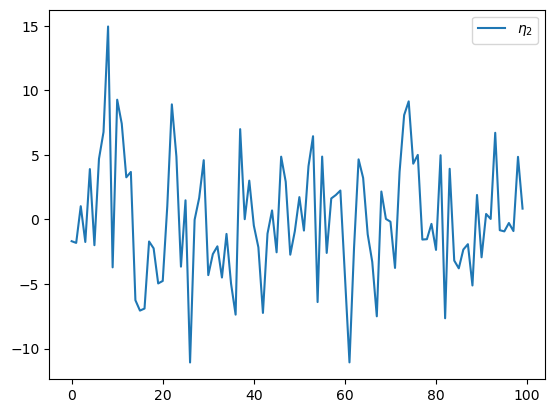

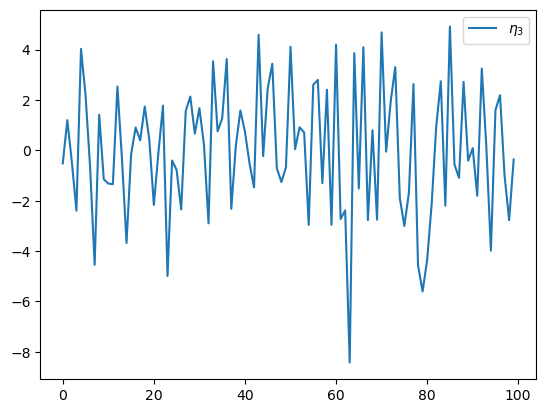

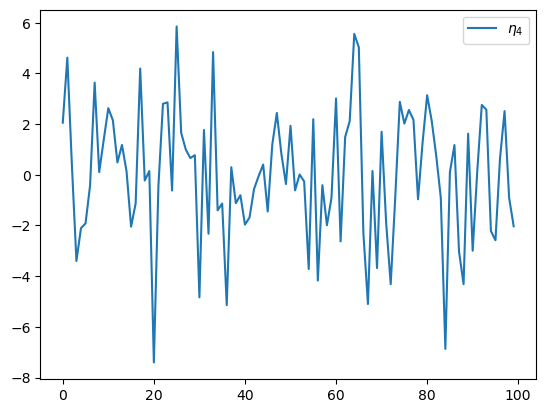

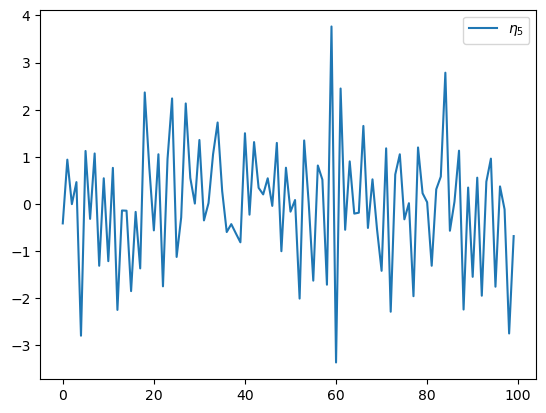

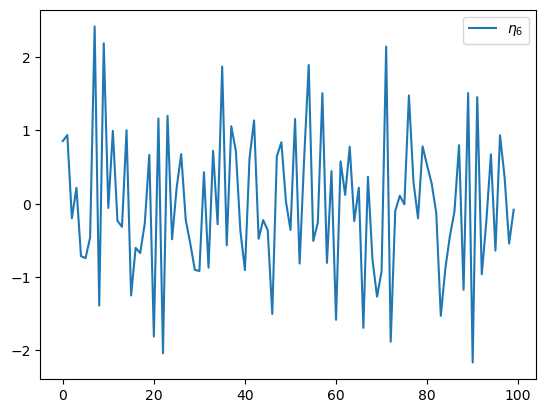

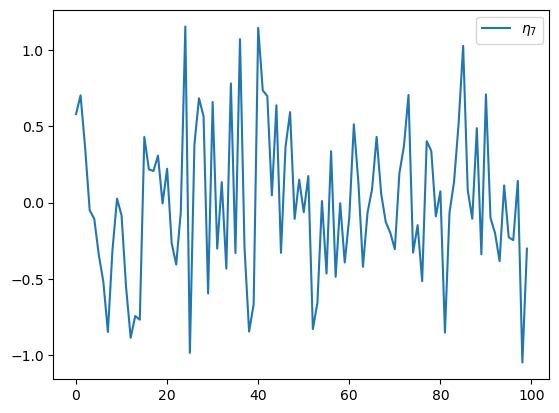

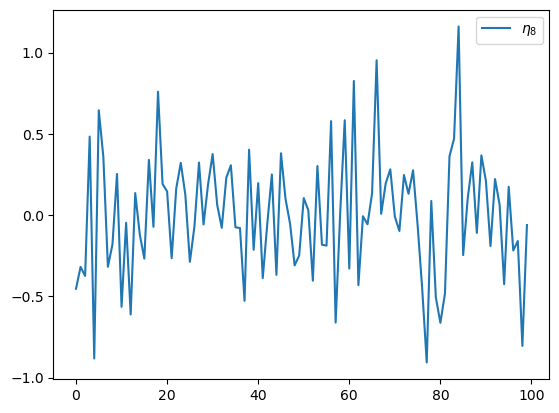

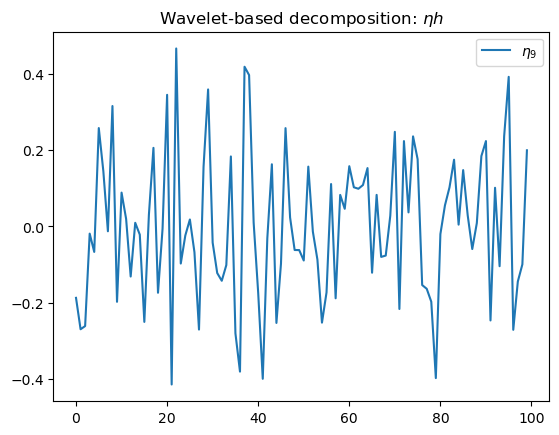

In [251]:
model.plot_scores(shared=False)

In [252]:
t = 0
fitted_scores = model.scores[:, t]
fitted_scores.shape
predicted_Y = model.predict(fitted_scores)

C:\Users\user\AppData\Local\Temp\ipykernel_9768\3283452001.py:254: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat_predicted[:, t] = self.Ybar + self.H @ new_scores[:, t]


In [253]:
# verifica se há diferença entre estimado e previsto
np.any(model.Yhat[:, t] != predicted_Y[:,t])

np.False_